In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given datasets
iris = datasets.load_iris()

data = {
    "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14,
               4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69,
               6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26],
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10
}

PlantGrowth = pd.DataFrame(data)


In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

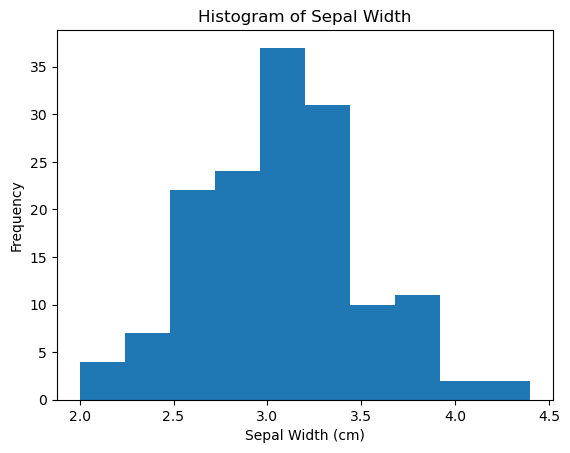

In [7]:
## 1a 

plt.figure()
plt.hist(iris_df["sepal width (cm)"], bins=10)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Width")
plt.show()

In [ ]:
## 1b: since the histogram is skewed to the right, mean is expected to be higher than median.

In [10]:
## 1c

mean_sw = iris_df["sepal width (cm)"].mean()
median_sw = iris_df["sepal width (cm)"].median()

mean_sw, median_sw

(np.float64(3.0573333333333337), 3.0)

In [12]:
## 1d 

threshold = np.percentile(iris_df["sepal width (cm)"], 73)
threshold

np.float64(3.3)

In [13]:
## 3.3 cm 

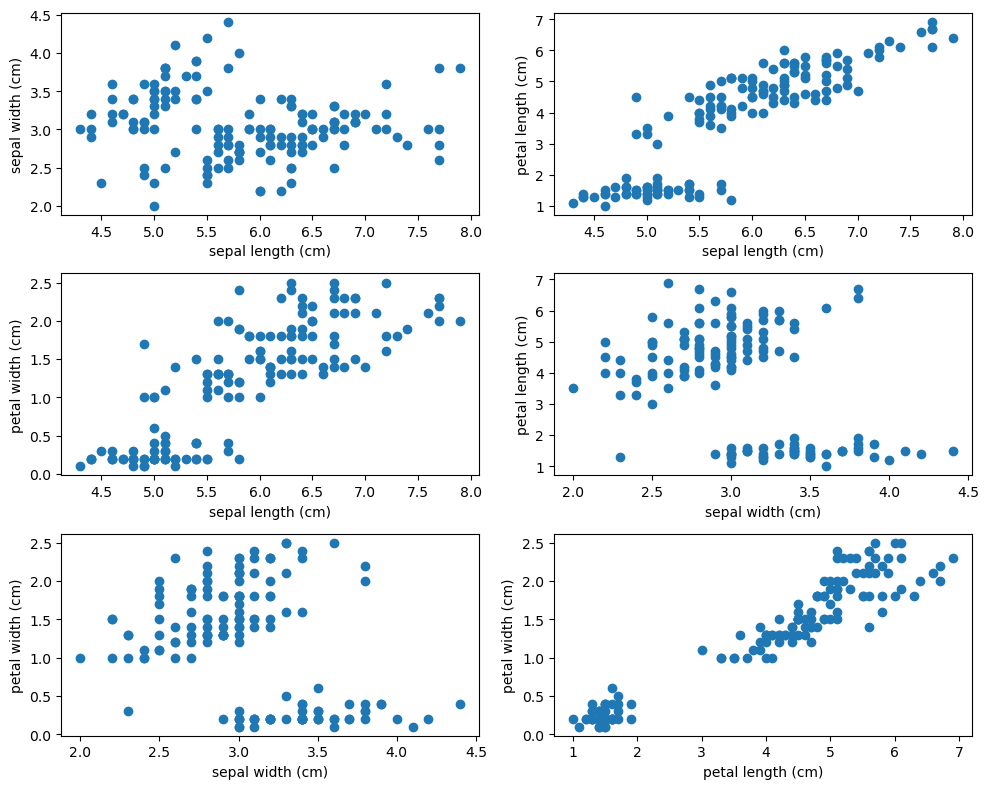

In [14]:
## 1e

cols = iris_df.columns
plt.figure(figsize=(10, 8))
plot_num = 1

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        plt.subplot(3, 2, plot_num)
        plt.scatter(iris_df[cols[i]], iris_df[cols[j]])
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plot_num += 1

plt.tight_layout()
plt.show()

In [17]:
## 1f: the strongest relation ship was petal length and petal width, the weakest was seapl length and sepal width 

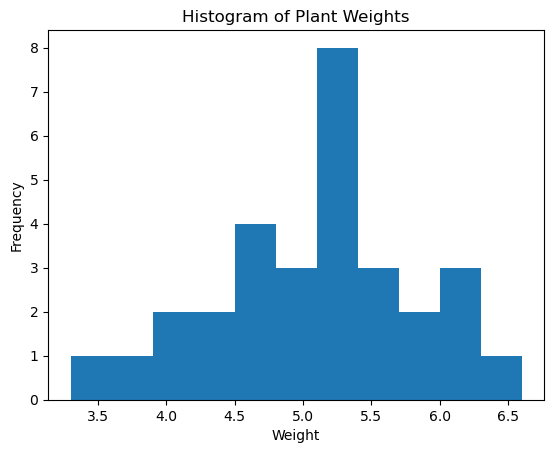

In [19]:
##2a
bins = np.arange(3.3, PlantGrowth["weight"].max() + 0.3, 0.3)

plt.figure()
plt.hist(PlantGrowth["weight"], bins=bins)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Plant Weights")
plt.show()


<Figure size 640x480 with 0 Axes>

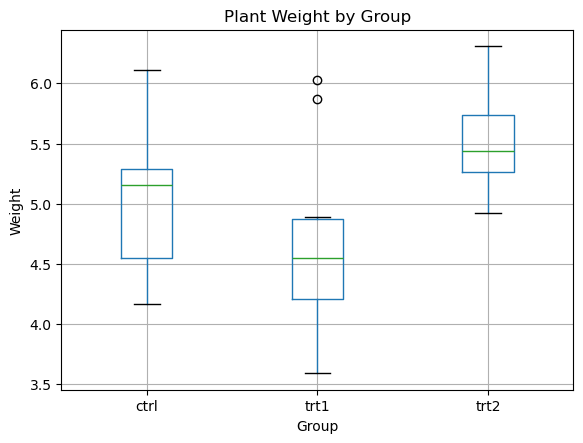

In [20]:
## 2b

plt.figure()
PlantGrowth.boxplot(column="weight", by="group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.title("Plant Weight by Group")
plt.suptitle("")
plt.show()

In [21]:
## 2c: approx 80%

In [22]:
## 2d

min_trt2 = PlantGrowth[PlantGrowth["group"] == "trt2"]["weight"].min()

trt1 = PlantGrowth[PlantGrowth["group"] == "trt1"]["weight"]
percent_below = (trt1 < min_trt2).mean() * 100

percent_below

np.float64(80.0)

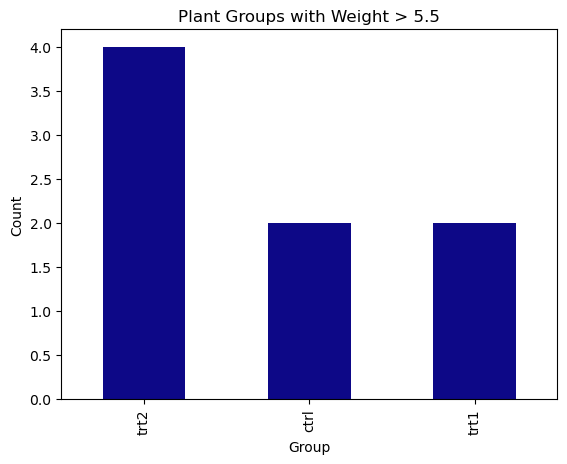

In [24]:
## 2e

filtered = PlantGrowth[PlantGrowth["weight"] > 5.5]
counts = filtered["group"].value_counts()

plt.figure()
counts.plot(kind="bar", colormap="plasma")
plt.xlabel("Group")
plt.ylabel("Count")
plt.title("Plant Groups with Weight > 5.5")
plt.show()